<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [51]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")
print(netflix_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
None


In [52]:
movies_90s = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] <= 1999)]
print(movies_90s.head())

    show_id   type  ...                                        description     genre
6        s8  Movie  ...  After one of his high school students attacks ...    Dramas
118    s167  Movie  ...  At the center of this engrossing melodrama is ...    Dramas
145    s211  Movie  ...  After a run-in with Richard Grieco, dimwits Do...  Comedies
167    s239  Movie  ...  When a philandering club promoter sets out to ...  Comedies
194    s274  Movie  ...  Raised by a kindly thief, orphaned Jimmy goes ...    Dramas

[5 rows x 11 columns]


In [53]:
summary_stats = movies_90s.describe(include='all')
print(summary_stats)

       show_id  ...   genre
count      183  ...     183
unique     183  ...      10
top         s8  ...  Action
freq         1  ...      48
mean       NaN  ...     NaN
std        NaN  ...     NaN
min        NaN  ...     NaN
25%        NaN  ...     NaN
50%        NaN  ...     NaN
75%        NaN  ...     NaN
max        NaN  ...     NaN

[11 rows x 11 columns]


In [54]:
release_year_counts = movies_90s['release_year'].value_counts().sort_index()
print(release_year_counts)

1990    14
1991    14
1992    16
1993    16
1994    14
1995    16
1996    15
1997    26
1998    26
1999    26
Name: release_year, dtype: int64


In [55]:
# Ensure the 'duration' column is of string type before using .str accessor
movies_90s['duration'] = movies_90s['duration'].astype(str)

# Extract numeric duration in minutes from the 'duration' column
movies_90s['duration'] = movies_90s['duration'].str.extract(r'(\d+)').astype(float)

# Find the most frequent movie duration (mode)
most_frequent_duration = int(movies_90s['duration'].mode()[0])

duration = most_frequent_duration

# Print the result
print(f"The most frequent movie duration in the 1990s is {duration} minutes.")

The most frequent movie duration in the 1990s is 94 minutes.


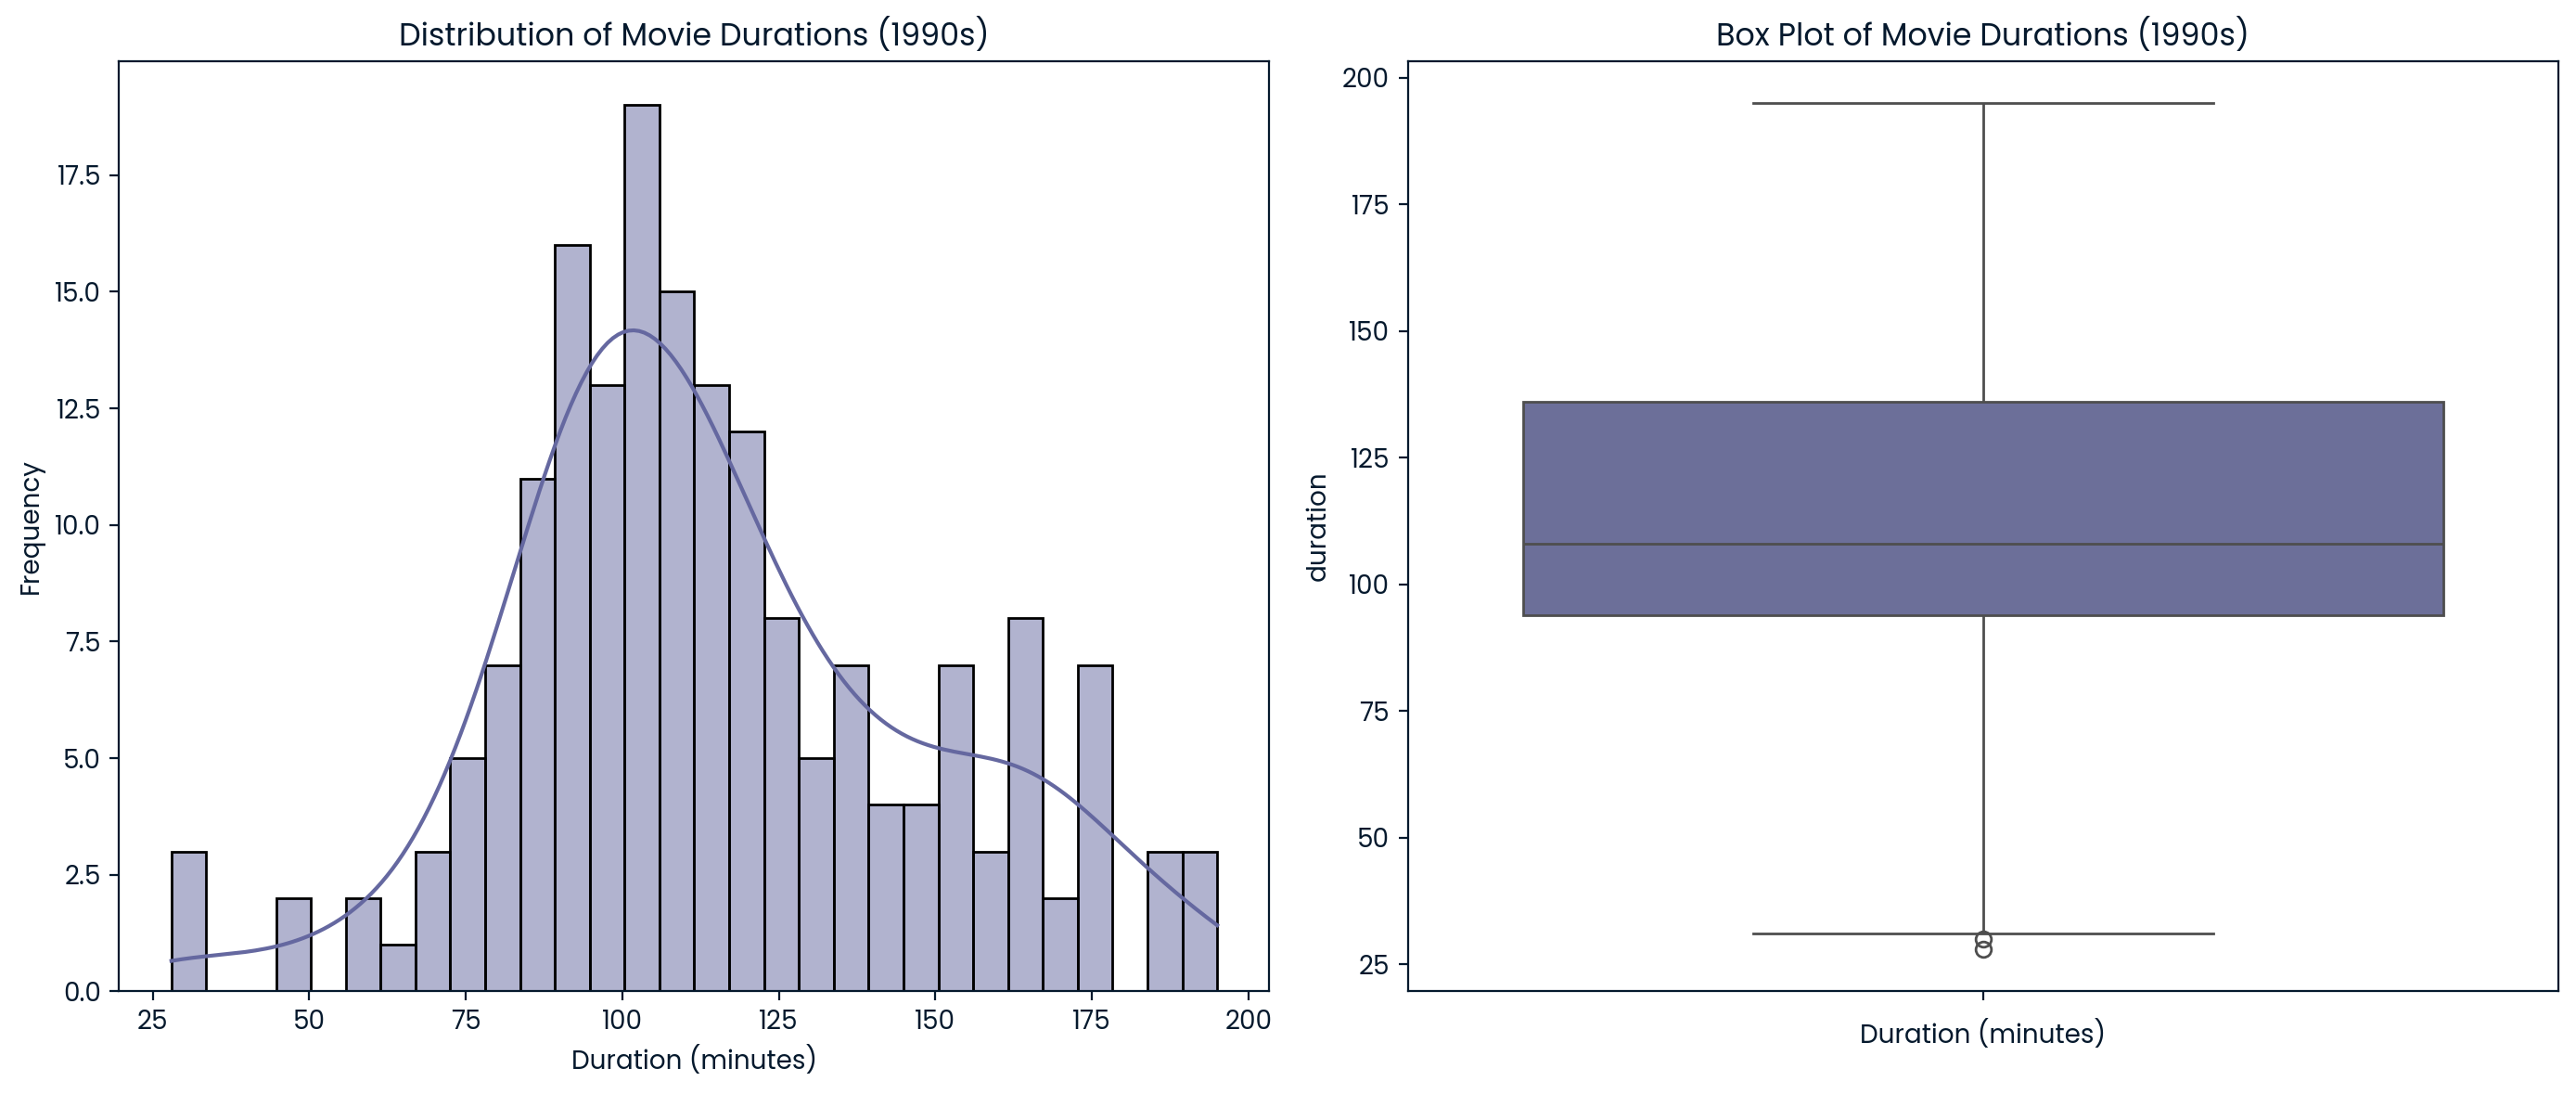

In [56]:
import seaborn as sns
plt.figure(figsize=(14, 6))

# Histogram for duration distribution
plt.subplot(1, 2, 1)
sns.histplot(movies_90s['duration'], bins=30, kde=True)
plt.title('Distribution of Movie Durations (1990s)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Box plot for duration distribution
plt.subplot(1, 2, 2)
sns.boxplot(y=movies_90s['duration'])
plt.title('Box Plot of Movie Durations (1990s)')
plt.xlabel('Duration (minutes)')

# Display the plots
plt.tight_layout()
plt.show()

In [57]:
short_action_movies_90s = movies_90s[(movies_90s['genre'].str.contains('Action', case=False)) & (movies_90s['duration'] < 90)]

# Count the number of short action movies
short_movie_count = short_action_movies_90s.shape[0]

# Save the result
print(f"The number of short action movies released in the 1990s is {short_movie_count}.")

The number of short action movies released in the 1990s is 7.
